In [32]:
import pygimli as pg
import os 

from Hilfsfunktionen import processing 
from Hilfsfunktionen import adjust
from Hilfsfunktionen import read 
from Hilfsfunktionen import filter

# read data
dataset = 'all_timesteps'
wenner, dd = read(filename = dataset)

# Merge Wenner and DD
for wen in wenner:
    for dipol in dd:
        if wen[0] == dipol[0]:
            wen[1].add(dipol[1])

# Processing and filtering
for data in wenner:
    filter(data[1], filter_value = 0.5 ,  setError = False, sort_out_error = 10000)
    processing(data[1],  max_err = 10, smallest_rhoa = 5, biggest_rhoa = 10000,
               err_abs = 0.01, err_rel = .03, max_err_est =11,  setError = False, sort_out_error = 10000  )
# Remove values that double or halve relative to the subsequent time step
adjust(wenner) # same quadropoles for all time steps
for nr, data in enumerate(wenner):
    if nr > 0:
        wenner[nr-1][1].remove(data[1]['rhoa']/wenner[nr-1][1]['rhoa']>1.9)
adjust(wenner) # same quadropoles for all time steps
for nr, data in enumerate(wenner):
    if nr > 0:
        wenner[nr-1][1].remove(data[1]['rhoa']/wenner[nr-1][1]['rhoa']<0.5)
adjust(wenner) # same quadropoles for all time steps

# save filtered data 
for ordner_name, daten_objekt in wenner: 
    ordner_pfad = os.path.join("filtered_data", ordner_name) 
    os.makedirs(ordner_pfad, exist_ok=True)
    datei_pfad = os.path.join(ordner_pfad, "%s.ohm" % dataset)
    daten_objekt.save(datei_pfad)

24/04/25 - 03:11:45 - pyGIMLi - INFO - Cache C:\Users\johan\anaconda3\envs\pg\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (16.1s x 1): C:\Users\johan\AppData\Roaming\pygimli\Cache\220466099119509324
24/04/25 - 03:11:45 - pyGIMLi - INFO - Cache C:\Users\johan\anaconda3\envs\pg\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (15.2s x 2): C:\Users\johan\AppData\Roaming\pygimli\Cache\8733623346506378493
24/04/25 - 03:11:46 - pyGIMLi - INFO - Cache C:\Users\johan\anaconda3\envs\pg\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (15.3s x 2): C:\Users\johan\AppData\Roaming\pygimli\Cache\5103226518465848507
24/04/25 - 03:11:46 - pyGIMLi - INFO - Cache C:\Users\johan\anaconda3\envs\pg\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (8.9s x 5): C:\Users\johan\AppData\Roaming\pygimli\Cache\6898679662437622895
24/04/25 - 03:11:47 - pyGIMLi - INFO - Cache C:\Users\johan\anaconda3\

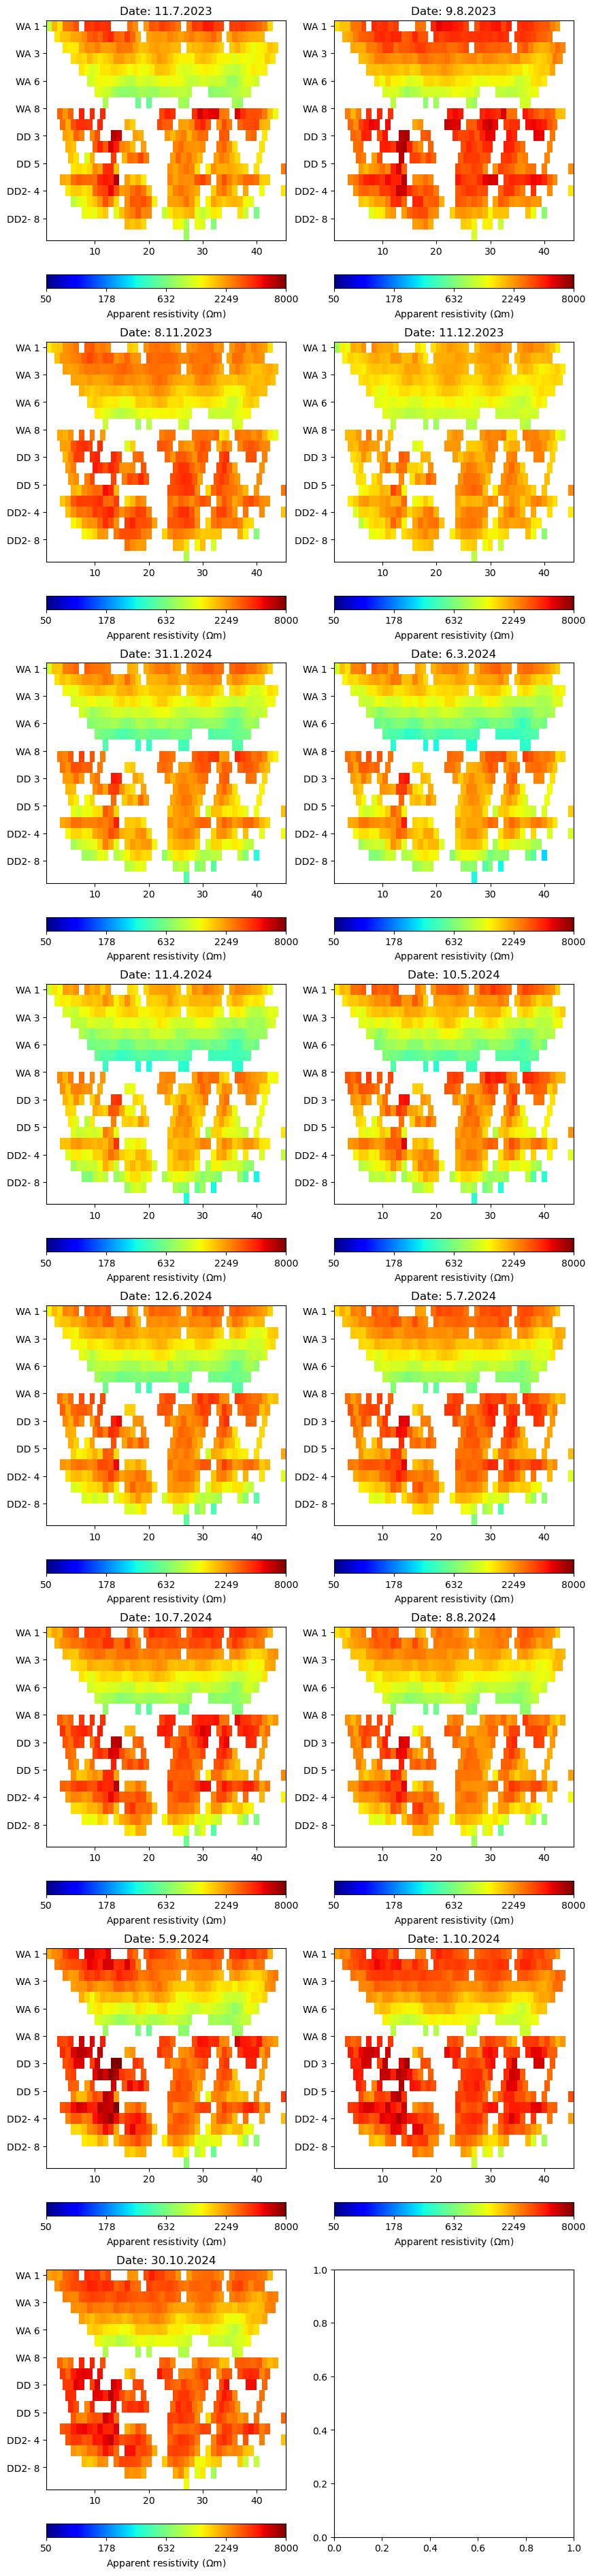

In [33]:
import matplotlib.pyplot as plt
from datetime import datetime 
from pygimli.physics import ert
# Darstellung Pseudosektionen
datenvektor = wenner
n = len(datenvektor)
nrows = (n + 1) // 2  # Berechnet die Anzahl der Reihen, rundet auf die nächste ganze Zahl auf

fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize=(10, nrows * 6))
axs = axs.flatten()  # Umwandeln ins eindimensionale Array
for data, ax in zip(datenvektor, axs):
    datum = datetime.strptime(data[0], '%y%m%d')
    ert.show(data[1], data[1]['rhoa'], ax=ax, cMin=50, cMax=8000, cMap='jet')
    ax.set_title('Date: ' + str(datum.day) + '.' + str(datum.month) + '.' + str(datum.year))
   

In [34]:
wenner

[['230711',
  Data: Sensors: 50 data: 521, nonzero entries: ['a', 'b', 'err', 'i', 'ip', 'k', 'm', 'n', 'r', 'rhoa', 'u', 'valid']],
 ['230809',
  Data: Sensors: 50 data: 521, nonzero entries: ['a', 'b', 'err', 'i', 'ip', 'k', 'm', 'n', 'r', 'rhoa', 'u', 'valid']],
 ['231108',
  Data: Sensors: 50 data: 521, nonzero entries: ['a', 'b', 'err', 'i', 'ip', 'k', 'm', 'n', 'r', 'rhoa', 'u', 'valid']],
 ['231211',
  Data: Sensors: 50 data: 521, nonzero entries: ['a', 'b', 'err', 'i', 'k', 'm', 'n', 'r', 'rhoa', 'u', 'valid']],
 ['240131',
  Data: Sensors: 50 data: 521, nonzero entries: ['a', 'b', 'err', 'i', 'k', 'm', 'n', 'r', 'rhoa', 'u', 'valid']],
 ['240306',
  Data: Sensors: 50 data: 521, nonzero entries: ['a', 'b', 'err', 'i', 'k', 'm', 'n', 'r', 'rhoa', 'u', 'valid']],
 ['240411',
  Data: Sensors: 50 data: 521, nonzero entries: ['a', 'b', 'err', 'i', 'k', 'm', 'n', 'r', 'rhoa', 'u', 'valid']],
 ['240510',
  Data: Sensors: 50 data: 521, nonzero entries: ['a', 'b', 'err', 'i', 'k', 'm', 